# Algorithm complexity, Revisited

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*Def*: $O(g) = f$

$\exists c, n_0: 0 \leq f \leq cg$ for $\forall n \geq n_0$

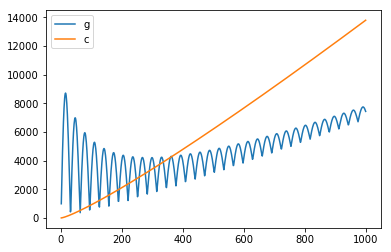

In [72]:
x = np.arange(1,1000)
g = x*np.log(x) + 10**6 * np.abs(np.sin(x/10))/(x+100)
plt.plot(x, g, label='g')

f = x*np.log(x)
plt.plot(x, 2*f, label='c')

plt.legend()
plt.show()

*Def*: $\Omega(g) = f$

$\exists c, n_0: 0 \leq cg \leq f $ for $\forall n \geq n_0$

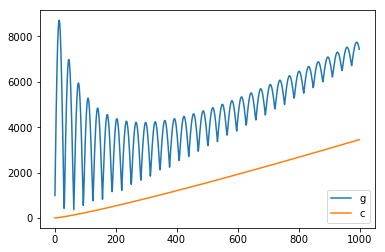

In [74]:
x = np.arange(1,1000)
g = x*np.log(x) + 10**6 * np.abs(np.sin(x/10))/(x+100)
plt.plot(x, g, label='g')

f = x*np.log(x)
plt.plot(x, 0.5*f, label='c')

plt.legend()
plt.show()

*Def*: $\Theta(g) = f$

$\exists c_1, c_2, n_0: 0 \leq c_1g \leq f \leq c_2g$ for $\forall n \geq n_0$

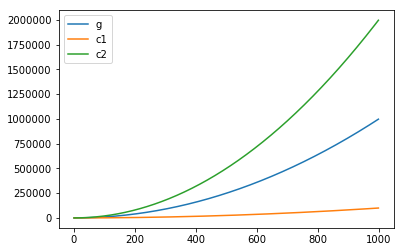

In [15]:
x = np.arange(0,1000)
g = x**2 - x + 1 + np.sqrt(x)
plt.plot(x, g, label='g')

f = x**2
plt.plot(x, 0.1*f, label='c1')
plt.plot(x, 2*f, label='c2')

plt.legend()
plt.show()

# Rabing-Karp Algorithm

### Naive

In [5]:
def search_naive(text, pattern):
    indices = []
    for i in range(len(text) - len(pattern)):
        if text[i: i + len(pattern)] == pattern:
            indices.append(i)
    return indices

In [6]:
from unittest import *


class SearchNaiveTest(TestCase):
    def setUp(self):
        self.search = search_naive
    def test_empty(self):
        text = ''
        pattern = 'smth'
        self.assertEqual(len(self.search(text, pattern)), 0)
        
    def test_big_pattern(self):
        text = 'blabla'
        pattern = 'blablabla'
        self.assertEqual(len(self.search(text, pattern)), 0)
        
    def test_count(self):
        text = 'Betty Botter bought some butter, \
            But, she said, the butter’s bitter. \
            If I put it in my batter, \
            It will make my batter bitter.'
        pattern = 'tt'
        indices = [2, 8, 27, 66, 75, 113, 149, 156]
        self.assertListEqual(self.search(text, pattern), indices)
        
case = SearchNaiveTest()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

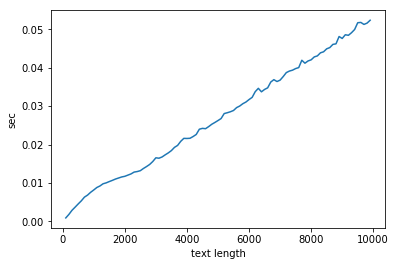

In [116]:
import time


x = np.arange(100,10000, 100)
y = []
for t in x:
    text = 'abcdekjnwenfwnefnwnle'*t
    pattern = 'jnwenfw'
    
    start = time.time()
    search_naive(text, pattern)
    y.append(time.time() - start)
    EqCounter.reset()
    
plt.plot(x, y)
plt.xlabel('text length')
plt.ylabel('sec')
plt.show()

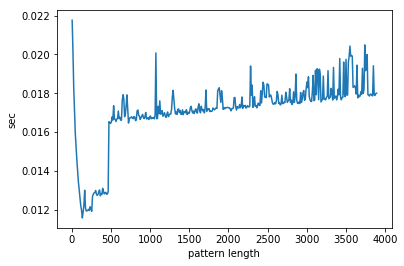

In [124]:
import time

max_pattern = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf'*100
x = np.arange(2, len(max_pattern), 10)
y = []
for t in x:
    text = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf wefwer'*1000
    pattern = max_pattern[:t]
    
    start = time.time()
    search_naive(text, pattern)
    y.append(time.time() - start)
    
plt.plot(x, y)
plt.xlabel('pattern length')
plt.ylabel('sec')
plt.show()

$\Rightarrow   O(|T||P|)$

### improvement: use hash functions for fast string comparison

if $hash(P) \neq hash(S)  \Rightarrow P != S$

if $hash(P) = hash(S)  \Rightarrow$ might be $ P = S$

collision probability $Pr[h(P) = h(S) | P \neq S]   \leq  $$ |P|\over {p}$ for polynomial hashing



## Polynomial hashing

$H_p = \{ h(S) = \sum^{|S|-1}_{j=0} s_j x^j   (mod   p) \}$

In [1]:
def poly_hash(s, x=31, p=997):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

In [2]:
def search_rabin(text, pattern):
    if len(pattern) == 0:
        return []
    indices = []
    pattern_hash = poly_hash(pattern)
    for i in range(len(text) - len(pattern) + 1):
        substr_hash = poly_hash(text[i: i + len(pattern)])
        if substr_hash == pattern_hash:
            if text[i: i + len(pattern)] == pattern:
                indices.append(i)
    return indices

In [7]:
from unittest import *


class SearchRabinTest(SearchNaiveTest):
    def setUp(self):
        self.search = search_rabin
        
    def test_empty2(self):
        self.assertListEqual(self.search('',''),[])
        
case = SearchRabinTest()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

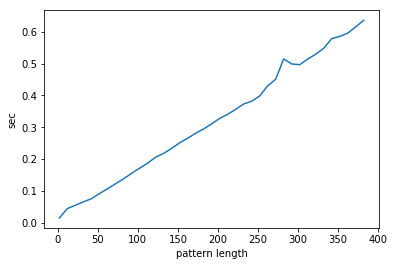

In [163]:
import time

max_pattern = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf'*10
x = np.arange(2, len(max_pattern), 10)
y = []
for t in x:
    text = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf wefwer'*100
    pattern = max_pattern[:t]
    
    start = time.time()
    search_rabin(text, pattern)
    y.append(time.time() - start)
    
plt.plot(x, y)
plt.xlabel('pattern length')
plt.ylabel('sec')
plt.show()

$\Rightarrow   O(|T||P|)$

### optimization: precompute hashes

$*Def* h[i] := hash(s[i: i + len(P))$

$\Rightarrow h[i] = sum^{i+|P|-1}_{j=i} T[j]x^{j-i}   (mod   p)$

$\Rightarrow h[i+1] = sum^{i+|P|}_{j=i} T[j]x^{j-i-1}   (mod   p)$

$\Rightarrow h[i] = xh[i+1] + T[i] - T[i+|P|]x^{|P|}   (mod   p)$

In [8]:
def search_rabin2(text, pattern, x=31, p=997):
    indices = []
    
    if len(pattern) == 0:
        return []
    
    if len(text) < len(pattern):
        return []
    
    # precompute hashes
    precomputed = [0] * (len(text) - len(pattern) + 1)
    precomputed[-1] = poly_hash(text[-len(pattern):], x, p)
    
    factor = 1
    for i in range(len(pattern)):
        factor = (factor*x + p) % p
        
    for i in range(len(text) - len(pattern)-1, -1, -1):
        precomputed[i] = (precomputed[i+1] * x + ord(text[i]) - factor * ord(text[i+len(pattern)]) + p) % p
    
    pattern_hash = poly_hash(pattern, x, p)
    for i in range(len(precomputed)):
        if precomputed[i] == pattern_hash:
            if text[i: i + len(pattern)] == pattern:
                indices.append(i)
    
    return indices

In [9]:
from unittest import *


class SearchRabin2Test(SearchNaiveTest):
    def setUp(self):
        self.search = search_rabin
        
case = SearchRabin2Test()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

$\Rightarrow O(T + nP)$, where n - number of occurences of P in T